In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Połączenie danych do jednego pliku excela

In [2]:
df_wro = pd.read_excel('wro.xlsx')
df_wwa = pd.read_excel('wwa.xlsx')
df_poz = pd.read_excel('poz.xlsx')
df_gda = pd.read_excel('gda.xlsx')
df_krk = pd.read_excel('krk.xlsx')

cities = [df_wro, df_wwa, df_poz, df_gda, df_krk]

df = pd.concat(cities, ignore_index=True)

In [3]:
df 

,Title,Amout,Number_of_rooms,City,Category,District,Sqr_meters,WebLink
0,kawalerka do wynajęcia na Złotnikach we Wrocła...,1 800 zł,one,wroclaw,wynajem,"Wrocław, Fabryczna - 23 maja 2023",35 m²,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...
1,Nowoczesna kawalerka dla wymagających + klimat...,1 700 zł,one,wroclaw,wynajem,"Wrocław, Psie Pole - Odświeżono dnia 24 maja 2023",22 m²,https://www.olx.pl/d/oferta/nowoczesna-kawaler...
2,"Kuźniki Kawalerka 25m2, pierwszy najem, NOWA!!!",2 100 zł,one,wroclaw,wynajem,"Wrocław, Fabryczna - 13 maja 2023",25 m²,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...
3,nowe - Legnicka 33/44c - bez pośredników,2 413 zł,one,wroclaw,wynajem,"Wrocław, Fabryczna - Dzisiaj o 06:37","25,56 m²",https://www.olx.plhttps://www.otodom.pl/pl/ofe...
4,"Wynajmę dużą kawalerkę (piękna), Wrocław, ...",2 200 zł,one,wroclaw,wynajem,"Wrocław, Fabryczna - Odświeżono Dzisiaj o 06:32",32 m²,https://www.olx.pl/d/oferta/wynajme-duza-kawal...
...,...,...,...,...,...,...,...,...
24797,Badurskiego 9 | mieszkanie 4-pok. M13,763 020 zł,four,krakow,sprzedaz,"Kraków, Podgórze Duchackie - 25 kwietnia 2023","70,65 m² - 10800 zł/m²",https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24798,Badurskiego 9 | mieszkanie 4-pok. M69,791 280 zł,four,krakow,sprzedaz,"Kraków, Podgórze Duchackie - 25 kwietnia 2023","70,65 m² - 11200 zł/m²",https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24799,Nowe osiedle pod Krakowem. Bez prowizji i poda...,599 000 zł,four,krakow,sprzedaz,"Kraków, Wzgórza Krzesławickie - 25 kwietnia 2023","81,40 m² - 7358.72 zł/m²",https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24800,Apartament dwupoziomowy taras wysoki standard ...,1 100 000 złdo negocjacji,four,krakow,sprzedaz,"Kraków, Bieńczyce - 25 kwietnia 2023",89 m² - 12359.55 zł/m²,https://www.olx.pl/d/oferta/apartament-dwupozi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24802 entries, 0 to 24801
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            24802 non-null  object
 1   Amout            24802 non-null  object
 2   Number_of_rooms  24802 non-null  object
 3   City             24802 non-null  object
 4   Category         24802 non-null  object
 5   District         24802 non-null  object
 6   Sqr_meters       24802 non-null  object
 7   WebLink          24802 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


# 2. Oczyszanie danych:


1. Amout - oczyszczenie (rozdzieć na kwotę oraz dodać kolumne z informacją o możliwej negocjacji) 

2. Number_of_rooms -zamienic na (kawalerka/ 2-pokoje/ 3-pokoje, 4-pokoje)

3. City - sprawdzicz czy miasto jest zgodne z miastem i dizelnica w kolumnie District 

4. Sqr. meters - usunąc m2 i rozdzielić cena/metr do nowej kolumny

## 2.1 Amount 

Po użyciu metody split() w pozycji [0] i [1] będzie kwota za wynajem/sprzedaż. 

W przypadku gdy kwota < 1 000 tylko pozycja 0 będzie dawała infomację o kwocie. 


Na początku sprawdzam czy oprócz widocznego na pierwszy rzut oka tekstu 'zł' i 'złdonegocjacji' nie ma innych niechcianych tekstów 

In [5]:
def suffix(text):
    
    text_split = text.split(' ')
    sufix_text = str()
    for value in text_split:
        try:
            float(value)
        except ValueError:
            sufix_text += value
    return sufix_text

In [6]:
df['suffix_amount'] = df['Amout'].apply(lambda x: suffix(x))

In [7]:
df.suffix_amount.unique() #Są dodatkowe dane, które zostały źle wprowadzone

array(['zł', 'złdonegocjacji', '586,31zł', '588,13zł', '529,72zł',
       '401,08zł', '773,70zł', '574,40zł', '014,10zł', '612,50zł',
       '966,50zł', '808,50zł', '569,75zł', '259,20zł', '769,75zł',
       '199,50zł', '574,70zł', '737,50zł', '730,50zł', '392,05zł',
       '337,36zł', '999,99zł', '738,97zł', '458,83zł', '630,85zł',
       '212,08zł', '305,16zł', '563,55zł', '307,50zł', '061,50zł',
       '012,50zł', '162,20zł', '530,18zł', '401,60zł', '743,35zł',
       '586,05zł', '530,90zł', '933,50zł', '001,20zł', '968,25zł',
       '580,20zł', '956,80zł', '516,94zł', '831,16zł', '877,50zł',
       '961,60zł', '032,50zł', '542,10zł', '617,75zł', '061,40zł',
       '862,20zł', '281,10zł', '986,23zł', '926,55zł', '304,90zł',
       '732,80zł', '504,50zł', '691,70zł', '625,90zł', '129,06zł',
       '107,60zł', '835,20zł', '461,60zł'], dtype=object)

In [8]:
df[df['suffix_amount']=='586,31zł']['Amout']

616    3 586,31 zł
Name: Amout, dtype: object

In [9]:
#Trzeba zmodyfikować ostatecznie funkcję suffix 

In [10]:
def suffix_amount(text):
    
    text = text.replace(',','.') #3 586,31 zł Pozbycie się takich przypadków
    text_split = text.split(' ')
    
    sufix_text = []
    amount = str()
    
    for value in text_split:
        try:
            float(value)
            amount += value
        except ValueError:
            sufix_text.append(value)
    
    amt_suff = [float(amount)]
    if 'negocjacji' in sufix_text:
        amt_suff.append('Do negocjacji')
    else:
        amt_suff.append('Brak możliwości negocjacji')
            
    return amt_suff

In [11]:
df['amount&suffix'] = df['Amout'].apply(lambda x: suffix_amount(x))

In [12]:
df['Amount'] = df['amount&suffix'].apply(lambda x: x[0])

In [13]:
df['Negotiation'] = df['amount&suffix'].apply(lambda x: x[1])

In [14]:
df.drop(['amount&suffix','Amout', 'suffix_amount'],axis='columns',inplace=True)

## 2.2. Number of rooms

In [15]:
rooms_word_dictionary = {
    'one': 'Kawalerka',
    'two': '2-pokoje',
    'three': '3-pokoje',
    'four': '4-pokoje'
}

rooms_num_dictionary = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
}

In [16]:
df['Layout'] = df['Number_of_rooms'].apply(lambda x: rooms_word_dictionary[x]) 
df['Rooms'] = df['Number_of_rooms'].apply(lambda x: rooms_num_dictionary[x])  

In [17]:
df.drop('Number_of_rooms',axis='columns',inplace=True)

In [18]:
df.head()

,Title,City,Category,District,Sqr_meters,WebLink,Amount,Negotiation,Layout,Rooms
0,kawalerka do wynajęcia na Złotnikach we Wrocła...,wroclaw,wynajem,"Wrocław, Fabryczna - 23 maja 2023",35 m²,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...,1800.0,Brak możliwości negocjacji,Kawalerka,1
1,Nowoczesna kawalerka dla wymagających + klimat...,wroclaw,wynajem,"Wrocław, Psie Pole - Odświeżono dnia 24 maja 2023",22 m²,https://www.olx.pl/d/oferta/nowoczesna-kawaler...,1700.0,Brak możliwości negocjacji,Kawalerka,1
2,"Kuźniki Kawalerka 25m2, pierwszy najem, NOWA!!!",wroclaw,wynajem,"Wrocław, Fabryczna - 13 maja 2023",25 m²,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...,2100.0,Brak możliwości negocjacji,Kawalerka,1
3,nowe - Legnicka 33/44c - bez pośredników,wroclaw,wynajem,"Wrocław, Fabryczna - Dzisiaj o 06:37","25,56 m²",https://www.olx.plhttps://www.otodom.pl/pl/ofe...,2413.0,Brak możliwości negocjacji,Kawalerka,1
4,"Wynajmę dużą kawalerkę (piękna), Wrocław, ...",wroclaw,wynajem,"Wrocław, Fabryczna - Odświeżono Dzisiaj o 06:32",32 m²,https://www.olx.pl/d/oferta/wynajme-duza-kawal...,2200.0,Brak możliwości negocjacji,Kawalerka,1


## 2.3. City and district

In [19]:
cities_names = ['Wrocław','Kraków','Poznań','Warszawa','Gdańsk']

df['City'] = df['District'].apply(lambda x: x.split(' ')[0])

In [20]:
df['City'].unique()

array(['Wrocław,', 'Wrocław', 'Warszawa,', 'Warszawa', 'Poznań,',
       'Poznań', 'Gdańsk,', 'Gdańsk', 'Tczew', 'Wejherowo',
       'Sianowo-Cieszonko', 'Skarszewy', 'Nowy', 'Reda', 'Stanisławie',
       'Stegna', 'Połęczyno', 'Rokitki', 'Rumia', 'Kartuzy',
       'Bernardówka', 'Hel', 'Dzierżążno-Leśnictwo', 'Mosty', 'Somonino',
       'Egiertowo', 'Sopot,', 'Sopot', 'Radunica', 'Rotmanka',
       'Rokitnica', 'Gdynia,', 'Pruszcz', 'Banino', 'Pępowo', 'Bojano',
       'Cedry', 'Suchy', 'Kościerzyna', 'Jastarnia', 'Bolszewo', 'Stogi',
       'Malbork', 'Zduny', 'Puck', 'Gościcino', 'Starogard', 'Orle',
       'Żabno', 'Miłoradz', 'Kosakowo', 'Dębogórze', 'Mechelinki',
       'Kraków,', 'Kraków'], dtype=object)

Niektóre ogłoszenia zostały błędnie scrapowane ze strony. 

Możliwe, że OLX dodaje wyróżnione ogłoszenia blisko wybranych dużych miast.

Nas interesują tylko wybranych 5 miast zapisanych w zmiennych cities_names

In [21]:
df['City'] = df['City'].apply(lambda x: x.split(',')[0]) #Niektóre miasta sa zapisane z przecinkami

In [22]:
df['City'].unique()

array(['Wrocław', 'Warszawa', 'Poznań', 'Gdańsk', 'Tczew', 'Wejherowo',
       'Sianowo-Cieszonko', 'Skarszewy', 'Nowy', 'Reda', 'Stanisławie',
       'Stegna', 'Połęczyno', 'Rokitki', 'Rumia', 'Kartuzy',
       'Bernardówka', 'Hel', 'Dzierżążno-Leśnictwo', 'Mosty', 'Somonino',
       'Egiertowo', 'Sopot', 'Radunica', 'Rotmanka', 'Rokitnica',
       'Gdynia', 'Pruszcz', 'Banino', 'Pępowo', 'Bojano', 'Cedry',
       'Suchy', 'Kościerzyna', 'Jastarnia', 'Bolszewo', 'Stogi',
       'Malbork', 'Zduny', 'Puck', 'Gościcino', 'Starogard', 'Orle',
       'Żabno', 'Miłoradz', 'Kosakowo', 'Dębogórze', 'Mechelinki',
       'Kraków'], dtype=object)

In [23]:
data_length_before = len(df)
print('Ilość danych przed: ', data_length_before)

Ilość danych przed:  24802


In [24]:
df = df[(df['City'] == 'Wrocław') | (df['City'] == 'Warszawa') | (df['City'] == 'Poznań')| (df['City'] == 'Kraków')| (df['City'] == 'Gdańsk')].copy()

In [25]:
data_length_after = len(df)
print('Ilość danych przed: ', data_length_after)
print('Zmniejszona ilość ogłoszeń: ', data_length_before-data_length_after)

Ilość danych przed:  24481
Zmniejszona ilość ogłoszeń:  321


In [26]:
#District
def district(text):
    
    text_split = text.split(' ')[1:]
    district_name = str()
    for word in text_split:
        if word == '-':
            break
        else:
            district_name += f'{word} '
            
    if len(district_name) == 0:
        district_name = "Nie podano"
        
    district_name = district_name.strip()
    return district_name

In [27]:
df['District'] = df['District'].apply(lambda x: district(x))

In [28]:
df['District'].unique()

array(['Fabryczna', 'Psie Pole', 'Stare Miasto', 'Krzyki', 'Śródmieście',
       'Nie podano', 'Wola', 'Praga-Południe', 'Bemowo', 'Ursynów',
       'Praga-Północ', 'Mokotów', 'Ursus', 'Wawer', 'Włochy', 'Białołęka',
       'Targówek', 'Ochota', 'Żoliborz', 'Bielany', 'Rembertów',
       'Wilanów', 'Wesoła', 'Wilda', 'Grunwald', 'Winogrady', 'Dębiec',
       'Górczyn', 'Łazarz', 'Starołęka', 'Junikowo', 'Piątkowo', 'Jeżyce',
       'Rataje', 'Warszawskie', 'Sołacz', 'Łacina', 'Naramowice',
       'Ławica', 'Komandoria', 'Podolany', 'Ogrody', 'Strzeszyn',
       'Chartowo', 'Smochowice', 'Winiary', 'Śródka', 'Szczepankowo',
       'Przymorze Wielkie', 'Chełm z dzielnicą Gdańsk Południe',
       'Przymorze Małe', 'Strzyża', 'Wrzeszcz', 'Żabianka', 'Ujeścisko',
       'Jasień', 'Piecki-Migowo', 'Oliwa', 'Aniołki', 'Orunia',
       'Suchanino', 'Brzeźno', 'Brętowo', 'Siedlce', 'Letnica',
       'Olszynka', 'Osowa', 'Matarnia', 'Zaspa Rozstaje', 'Kokoszki',
       'Wzgórze Mickiewicza', 'No

## 2.4 Sq. meters

In [29]:
df['Sqr_meters']

0                            35 m²
1                            22 m²
2                            25 m²
3                         25,56 m²
4                            32 m²
                   ...            
24797       70,65 m² - 10800 zł/m²
24798       70,65 m² - 11200 zł/m²
24799     81,40 m² - 7358.72 zł/m²
24800       89 m² - 12359.55 zł/m²
24801    78,50 m² - 12726.11 zł/m²
Name: Sqr_meters, Length: 24481, dtype: object

In [30]:
df['Sqr_meters'] = df['Sqr_meters'].apply(lambda x: x.replace(',','.'))
df['Sq_meters'] = df['Sqr_meters'].apply(lambda x: round(float(x.split(' ')[0])))

In [31]:
df.head()

,Title,City,Category,District,Sqr_meters,WebLink,Amount,Negotiation,Layout,Rooms,Sq_meters
0,kawalerka do wynajęcia na Złotnikach we Wrocła...,Wrocław,wynajem,Fabryczna,35 m²,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...,1800.0,Brak możliwości negocjacji,Kawalerka,1,35
1,Nowoczesna kawalerka dla wymagających + klimat...,Wrocław,wynajem,Psie Pole,22 m²,https://www.olx.pl/d/oferta/nowoczesna-kawaler...,1700.0,Brak możliwości negocjacji,Kawalerka,1,22
2,"Kuźniki Kawalerka 25m2, pierwszy najem, NOWA!!!",Wrocław,wynajem,Fabryczna,25 m²,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...,2100.0,Brak możliwości negocjacji,Kawalerka,1,25
3,nowe - Legnicka 33/44c - bez pośredników,Wrocław,wynajem,Fabryczna,25.56 m²,https://www.olx.plhttps://www.otodom.pl/pl/ofe...,2413.0,Brak możliwości negocjacji,Kawalerka,1,26
4,"Wynajmę dużą kawalerkę (piękna), Wrocław, ...",Wrocław,wynajem,Fabryczna,32 m²,https://www.olx.pl/d/oferta/wynajme-duza-kawal...,2200.0,Brak możliwości negocjacji,Kawalerka,1,32


## 2.5 Wybór istotnych kolumn


In [32]:
df['Category'] = df['Category'].apply(lambda x: x.capitalize())
df['Category'] = df['Category'].apply(lambda x: x.replace('sprzedaz','Sprzedaż'))

In [33]:
df = df[['City','District','Category','Layout','Amount','Negotiation','Sq_meters','Rooms','WebLink']]
df.rename({'Layout':'Property layout', 'Amount':'Price'}, axis='columns', inplace=True)
df.reset_index(drop=True, inplace=True)

## 2.6. Ostateczny dataframe

In [34]:
df

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
0,Wrocław,Fabryczna,Wynajem,Kawalerka,1800.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...
1,Wrocław,Psie Pole,Wynajem,Kawalerka,1700.0,Brak możliwości negocjacji,22,1,https://www.olx.pl/d/oferta/nowoczesna-kawaler...
2,Wrocław,Fabryczna,Wynajem,Kawalerka,2100.0,Brak możliwości negocjacji,25,1,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...
3,Wrocław,Fabryczna,Wynajem,Kawalerka,2413.0,Brak możliwości negocjacji,26,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
4,Wrocław,Fabryczna,Wynajem,Kawalerka,2200.0,Brak możliwości negocjacji,32,1,https://www.olx.pl/d/oferta/wynajme-duza-kawal...
...,...,...,...,...,...,...,...,...,...
24476,Kraków,Podgórze Duchackie,Sprzedaz,4-pokoje,763020.0,Brak możliwości negocjacji,71,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24477,Kraków,Podgórze Duchackie,Sprzedaz,4-pokoje,791280.0,Brak możliwości negocjacji,71,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24478,Kraków,Wzgórza Krzesławickie,Sprzedaz,4-pokoje,599000.0,Brak możliwości negocjacji,81,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24479,Kraków,Bieńczyce,Sprzedaz,4-pokoje,1100000.0,Do negocjacji,89,4,https://www.olx.pl/d/oferta/apartament-dwupozi...


In [35]:
df.to_excel('property_market.xlsx', index=False)

# 3. Usuwanie wartości odstających

In [36]:
df = pd.read_excel('property_market.xlsx')

In [37]:
df.head()

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
0,Wrocław,Fabryczna,Wynajem,Kawalerka,1800.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...
1,Wrocław,Psie Pole,Wynajem,Kawalerka,1700.0,Brak możliwości negocjacji,22,1,https://www.olx.pl/d/oferta/nowoczesna-kawaler...
2,Wrocław,Fabryczna,Wynajem,Kawalerka,2100.0,Brak możliwości negocjacji,25,1,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...
3,Wrocław,Fabryczna,Wynajem,Kawalerka,2413.0,Brak możliwości negocjacji,26,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
4,Wrocław,Fabryczna,Wynajem,Kawalerka,2200.0,Brak możliwości negocjacji,32,1,https://www.olx.pl/d/oferta/wynajme-duza-kawal...


In [38]:
#Usunięcie duplikatów
data_length = len(df)

In [39]:
print(data_length)

24481


In [40]:
df.drop_duplicates(inplace=True)

In [41]:
len_data_after_cleaning = len(df)
print(len_data_after_cleaning)
print('Usunieto:',data_length - len_data_after_cleaning,' duplikatów')

19184
Usunieto: 5297  duplikatów


# 3.1. Oczyszczenie danych z wartości odstających (Price)

In [42]:
df.groupby(['City','Category','Property layout']).describe()['Price'][['max','min','count']]

max       min   count
City     Category Property layout                              
Gdańsk   Sprzedaz 2-pokoje          1250000.0   39000.0   397.0
                  3-pokoje          3744000.0  199000.0   361.0
                  4-pokoje          4400000.0  375000.0   139.0
                  Kawalerka         1700000.0   20000.0    94.0
         Wynajem  2-pokoje             6500.0     140.0   369.0
                  3-pokoje            11000.0     350.0   127.0
                  4-pokoje             9500.0     500.0    29.0
                  Kawalerka            4200.0     250.0   139.0
Kraków   Sprzedaz 2-pokoje          2000000.0    2300.0   676.0
                  3-pokoje          2999000.0  225790.0   711.0
                  4-pokoje         12500000.0  459000.0   259.0
                  Kawalerka          770000.0  115000.0   224.0
         Wynajem  2-pokoje             7000.0     150.0  1011.0
                  3-pokoje             9500.0     350.0   551.0
                  4-pokoje            15000.0     700.0    87.0
                  Kawalerka            5500.0     130.0   712.0
Poznań   Sprzedaz 2-pokoje          1390000.0  140000.0   379.0
                  3-pokoje          1395000.0   97250.0   393.0
                  4-pokoje          4800000.0  310000.0   198.0
                  Kawalerka          665200.0  152880.0   136.0
         Wynajem  2-pokoje            70000.0     800.0   975.0
                  3-pokoje            14000.0      70.0   364.0
                  4-pokoje            11900.0     600.0    61.0
                  Kawalerka            4000.0     600.0   536.0
Warszawa Sprzedaz 2-pokoje          2000000.0  130000.0  1003.0
                  3-pokoje          8400000.0   34290.0   994.0
                  4-pokoje          9750000.0  462420.0   495.0
                  Kawalerka         1249000.0    3500.0   330.0
         Wynajem  2-pokoje             8400.0     200.0  1015.0
                  3-pokoje            35000.0     280.0   973.0
                  4-pokoje            38000.0     600.0   209.0
                  Kawalerka            5000.0     130.0   993.0
Wrocław  Sprzedaz 2-pokoje          2200000.0  101849.0   701.0
                  3-pokoje          5400000.0  150000.0   706.0
                  4-pokoje          3390000.0  460000.0   321.0
                  Kawalerka         1100000.0   70000.0   159.0
         Wynajem  2-pokoje             9000.0     250.0  1008.0
                  3-pokoje            15000.0     650.0   582.0
                  4-pokoje            15042.0     600.0   121.0
                  Kawalerka            3663.0     100.0   646.0

In [43]:
data_len = len(df)

## Kwoty zaniżone
Występują zaniżone wartości odstające od normy 

np. Wynajem 3-pokojowego mieszkania za 70zł/msc w Poznaniu lub kwoty rzędu 140 zł/msc w Gdańsku.

Po sprawdzeniu tych mieszkań okazuje się, że właściciele wynajmnują je na **doby**. 


In [44]:
df.sort_values(by='Price', ascending=True).head(10)

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
15516,Poznań,Winogrady,Wynajem,3-pokoje,70.0,Brak możliwości negocjacji,48,3,https://www.olx.pl/d/oferta/keatery-pracownicz...
420,Wrocław,Stare Miasto,Wynajem,Kawalerka,100.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/apartament-na-godz...
6572,Warszawa,Białołęka,Wynajem,Kawalerka,130.0,Brak możliwości negocjacji,28,1,https://www.olx.pl/d/oferta/kawalerka-na-lewan...
19504,Kraków,Prądnik Biały,Wynajem,Kawalerka,130.0,Brak możliwości negocjacji,4,1,https://www.olx.pl/d/oferta/do-wyn-komorka-lok...
17536,Gdańsk,Stogi z Przeróbką,Wynajem,2-pokoje,140.0,Brak możliwości negocjacji,43,2,https://www.olx.pl/d/oferta/mieszkanie-dla-4-5...
17653,Gdańsk,Stogi z Przeróbką,Wynajem,2-pokoje,150.0,Brak możliwości negocjacji,42,2,https://www.olx.pl/d/oferta/wynajem-mieszkania...
17470,Gdańsk,Młyniska,Wynajem,2-pokoje,150.0,Brak możliwości negocjacji,36,2,https://www.olx.pl/d/oferta/wynajme-apartament...
21114,Kraków,Grzegórzki,Wynajem,2-pokoje,150.0,Brak możliwości negocjacji,28,2,https://www.olx.pl/d/oferta/mieszkanie-na-wyna...
17474,Gdańsk,Olszynka,Wynajem,2-pokoje,150.0,Brak możliwości negocjacji,47,2,https://www.olx.pl/d/oferta/wynajme-apartament...
6318,Warszawa,Ursus,Wynajem,Kawalerka,160.0,Brak możliwości negocjacji,28,1,https://www.olx.pl/d/oferta/komorka-lokatorska...


In [45]:
df.loc[17474]['WebLink']

'https://www.olx.pl/d/oferta/wynajme-apartament-CID3-IDU5doI.html'

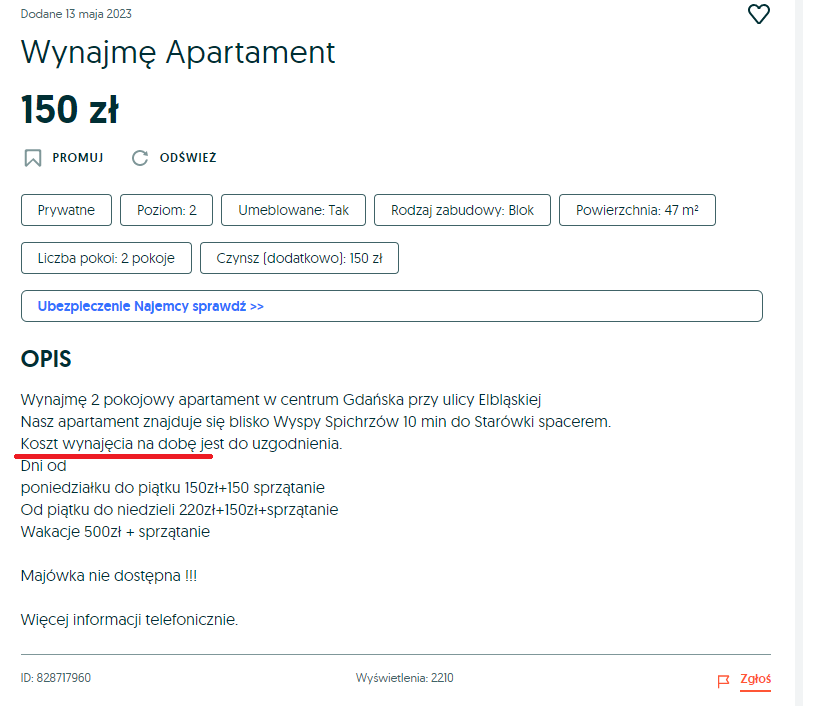

In [46]:
df[df['Price']>700].sort_values(by='Price', ascending=True)

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
15631,Poznań,Naramowice,Wynajem,4-pokoje,710.0,Brak możliwości negocjacji,1,4,https://www.olx.pl/d/oferta/poznan-pokoj-do-wy...
15309,Poznań,Piątkowo,Wynajem,3-pokoje,730.0,Brak możliwości negocjacji,8,3,https://www.olx.pl/d/oferta/pokoj-na-wynajem-w...
15284,Poznań,Dębiec,Wynajem,3-pokoje,750.0,Brak możliwości negocjacji,70,3,https://www.olx.pl/d/oferta/mieszkanie-dla-pra...
15369,Poznań,Łazarz,Wynajem,3-pokoje,750.0,Brak możliwości negocjacji,10,3,https://www.olx.pl/d/oferta/pokoj-na-wynajem-w...
17809,Gdańsk,Aniołki,Wynajem,3-pokoje,750.0,Do negocjacji,60,3,https://www.olx.pl/d/oferta/apartament-centrum...
...,...,...,...,...,...,...,...,...,...
24292,Kraków,Stare Miasto,Sprzedaz,4-pokoje,7553700.0,Brak możliwości negocjacji,216,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
11454,Warszawa,Śródmieście,Sprzedaz,3-pokoje,8400000.0,Brak możliwości negocjacji,169,3,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
12790,Warszawa,Nie podano,Sprzedaz,4-pokoje,9500000.0,Brak możliwości negocjacji,160,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
13164,Warszawa,Śródmieście,Sprzedaz,4-pokoje,9750000.0,Brak możliwości negocjacji,169,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...


In [47]:
df.loc[15631]['WebLink']

'https://www.olx.pl/d/oferta/poznan-pokoj-do-wynajecia-710-zl-z-oplatami-i-internetem-CID3-IDUEVJv.html'

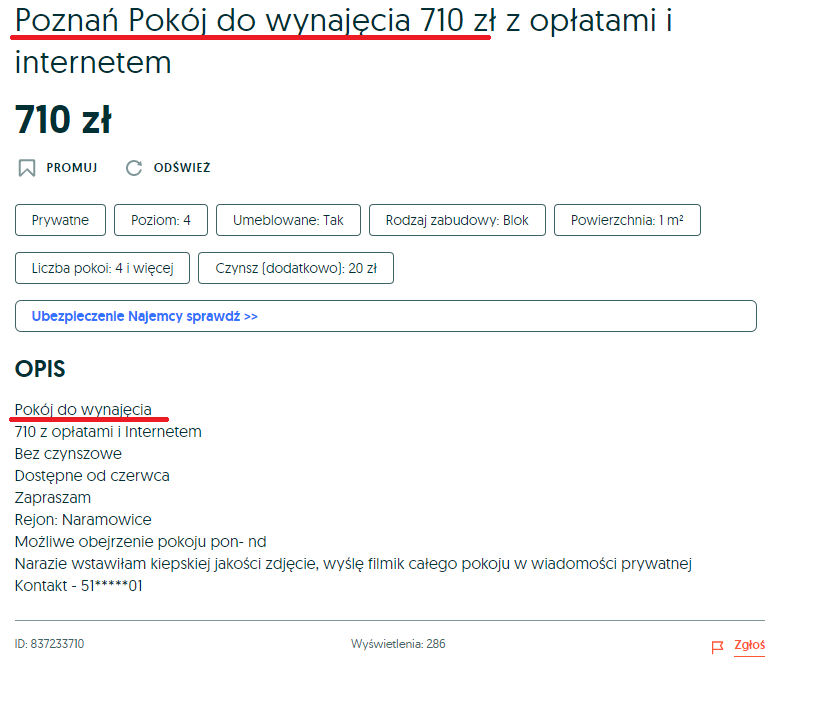

Na stronie OLX jest osobna kategoria jeśli ktoś chciałby wynająć pokój/stancję. 

Niektórzy właściciele błędnie klasyfikują swoje ogłoszenia. (Możliwe że też OLX podruzca wyróżnione ogłoszenia z innej kategorii choć ten scenariusz jest mniej prawdopodobny)

Trzeba zatem odseparować mieszkania które są pokojami i wynajmowane na dobę.


In [48]:
df[df['Price']>1600].sort_values(by='Price', ascending=True).head(15)['WebLink'] 

13630    https://www.olx.pl/d/oferta/wynajmowac-mieszka...
14737    https://www.olx.pl/d/oferta/wynajme-dwupokojow...
17169    https://www.olx.pl/d/oferta/gdansk-beethovena-...
14457    https://www.olx.pl/d/oferta/mieszkanie-2-pokoj...
19848    https://www.olx.pl/d/oferta/umeblowana-kawaler...
13675    https://www.olx.pl/d/oferta/5127-kawalerka-z-b...
19520    https://www.olx.pl/d/oferta/studio-25m2-okulic...
19511    https://www.olx.pl/d/oferta/studio-w-centrum-s...
539      https://www.olx.pl/d/oferta/kawalerka-jednooso...
17123    https://www.olx.pl/d/oferta/gdansk-ul-beethove...
13385    https://www.olx.plhttps://www.otodom.pl/pl/ofe...
17085    https://www.olx.pl/d/oferta/aktualne-gdansk-ul...
13341    https://www.olx.plhttps://www.otodom.pl/pl/ofe...
15070    https://www.olx.pl/d/oferta/wynajme-mieszkanie...
6542     https://www.olx.pl/d/oferta/ziemowita-4-targow...
Name: WebLink, dtype: object

Oferty od około 1600zł/msc są bardziej realne co widać równiez po tytułach linków do stron ogłoszeń 

**1 600 zł/msc** ustalono jako dolną granicę. 

In [49]:
df = df[df['Price']>1600].copy()

## Kwoty zawyżone 

In [50]:
df.sort_values(by='Price', ascending=False).head(10)

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
24289,Kraków,Stare Miasto,Sprzedaz,4-pokoje,12500000.0,Brak możliwości negocjacji,400,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
13164,Warszawa,Śródmieście,Sprzedaz,4-pokoje,9750000.0,Brak możliwości negocjacji,169,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
12790,Warszawa,Nie podano,Sprzedaz,4-pokoje,9500000.0,Brak możliwości negocjacji,160,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
11454,Warszawa,Śródmieście,Sprzedaz,3-pokoje,8400000.0,Brak możliwości negocjacji,169,3,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24292,Kraków,Stare Miasto,Sprzedaz,4-pokoje,7553700.0,Brak możliwości negocjacji,216,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
24375,Kraków,Stare Miasto,Sprzedaz,4-pokoje,7350000.0,Brak możliwości negocjacji,294,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
13126,Warszawa,Śródmieście,Sprzedaz,4-pokoje,7047230.0,Brak możliwości negocjacji,227,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
13111,Warszawa,Żoliborz,Sprzedaz,4-pokoje,6500000.0,Brak możliwości negocjacji,277,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
13113,Warszawa,Bielany,Sprzedaz,4-pokoje,6490000.0,Brak możliwości negocjacji,306,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
12549,Warszawa,Bielany,Sprzedaz,4-pokoje,6490000.0,Brak możliwości negocjacji,306,4,https://www.olx.pl/d/oferta/apartament-306m2-o...


In [51]:
df.loc[24289]['WebLink']

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/lokal-w-scislym-centrum-krakowa-ID4kxmM.html'

In [52]:
df.loc[13164]['WebLink']

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/apartament-3-sypialnie-zlota-44-na-43-pietrze-ID4krRu.html'

In [53]:
df.loc[12790]['WebLink']

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/zlota-44-160-m2-4-pokoje-3-lazienki-ID4cKou.html'

In [54]:
df.loc[13111]['WebLink']

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/panoramiczny-penthause-na-warszawskim-zoliborzu-ID4liTu.html'

Oferty z najwyższymi cenami wyglądają w porzadku, większość z nich pochodzi z serwisu otodom, którego oferkty również pojawiają się na stronie OLX, przez co linki do tych mieszkań zostały błędnie zapisane przez program scrapujący.

Jedynie pierwsza oferta została błędnie zaklasyfikowana jako lokal do prowadzenia działalności gastronomicznej za 12.5 mln zł.  

In [55]:
df.drop(24289, inplace=True)

In [56]:
data_len2 = len(df)
percent = (data_len - data_len2) / data_len
print(percent*100)
print(data_len - data_len2)

3.492493744787323
670


**860** Ofert błędnie zaklasyfikowanych przez właścicieli 

**Około 3,5%** danych zostało odrzuconych 

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
## Ponowne sprawdzenie danych 
## mieszkania na sprzedaż o małych wartościach

In [59]:
df.groupby(['City','Category','Property layout']).describe()['Price'][['max','min','count']]

max       min   count
City     Category Property layout                             
Gdańsk   Sprzedaz 2-pokoje         1250000.0   39000.0   397.0
                  3-pokoje         3744000.0  199000.0   361.0
                  4-pokoje         4400000.0  375000.0   139.0
                  Kawalerka        1700000.0   20000.0    94.0
         Wynajem  2-pokoje            6500.0    1650.0   330.0
                  3-pokoje           11000.0    2500.0   121.0
                  4-pokoje            9500.0    2900.0    26.0
                  Kawalerka           4200.0    1650.0   127.0
Kraków   Sprzedaz 2-pokoje         2000000.0    2300.0   676.0
                  3-pokoje         2999000.0  225790.0   711.0
                  4-pokoje         7553700.0  459000.0   258.0
                  Kawalerka         770000.0  115000.0   224.0
         Wynajem  2-pokoje            7000.0    1650.0   995.0
                  3-pokoje            9500.0    1800.0   533.0
                  4-pokoje           15000.0    1700.0    78.0
                  Kawalerka           5500.0    1650.0   603.0
Poznań   Sprzedaz 2-pokoje         1390000.0  140000.0   379.0
                  3-pokoje         1395000.0   97250.0   393.0
                  4-pokoje         4800000.0  310000.0   198.0
                  Kawalerka         665200.0  152880.0   136.0
         Wynajem  2-pokoje           70000.0    1630.0   922.0
                  3-pokoje           14000.0    1700.0   347.0
                  4-pokoje           11900.0    1800.0    46.0
                  Kawalerka           4000.0    1610.0   308.0
Warszawa Sprzedaz 2-pokoje         2000000.0  130000.0  1003.0
                  3-pokoje         8400000.0   34290.0   994.0
                  4-pokoje         9750000.0  462420.0   495.0
                  Kawalerka        1249000.0    3500.0   330.0
         Wynajem  2-pokoje            8400.0    1700.0  1008.0
                  3-pokoje           35000.0    1850.0   962.0
                  4-pokoje           38000.0    1800.0   198.0
                  Kawalerka           5000.0    1650.0   957.0
Wrocław  Sprzedaz 2-pokoje         2200000.0  101849.0   701.0
                  3-pokoje         5400000.0  150000.0   706.0
                  4-pokoje         3390000.0  460000.0   321.0
                  Kawalerka        1100000.0   70000.0   159.0
         Wynajem  2-pokoje            9000.0    1650.0   999.0
                  3-pokoje           15000.0    1712.0   568.0
                  4-pokoje           15042.0    1800.0   102.0
                  Kawalerka           3663.0    1650.0   609.0

In [60]:
df_sell = df[df['Category']=='Sprzedaz'].copy()

In [61]:
df_sell.sort_values(by='Price')

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
16962,Kraków,Bieńczyce,Sprzedaz,2-pokoje,2300.0,Brak możliwości negocjacji,54,2,https://www.olx.pl/d/oferta/mieszkanie-54-m2-2...
7346,Warszawa,Wola,Sprzedaz,Kawalerka,3500.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/komfortowe-nowocze...
13453,Gdańsk,Olszynka,Sprzedaz,Kawalerka,20000.0,Brak możliwości negocjacji,305,1,https://www.olx.pl/d/oferta/odstapie-uzytkowan...
9054,Warszawa,Targówek,Sprzedaz,3-pokoje,34290.0,Brak możliwości negocjacji,73,3,https://www.olx.pl/d/oferta/syndyk-sprzeda-1-8...
13808,Gdańsk,Nie podano,Sprzedaz,2-pokoje,39000.0,Brak możliwości negocjacji,33,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
...,...,...,...,...,...,...,...,...,...
18420,Kraków,Stare Miasto,Sprzedaz,4-pokoje,7350000.0,Brak możliwości negocjacji,294,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
18345,Kraków,Stare Miasto,Sprzedaz,4-pokoje,7553700.0,Brak możliwości negocjacji,216,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
8788,Warszawa,Śródmieście,Sprzedaz,3-pokoje,8400000.0,Brak możliwości negocjacji,169,3,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
9807,Warszawa,Nie podano,Sprzedaz,4-pokoje,9500000.0,Brak możliwości negocjacji,160,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...


In [62]:
df.loc[16962]['WebLink'] #Mieszkanie na wynajem 

'https://www.olx.pl/d/oferta/mieszkanie-54-m2-2300-pln-ul-pychowicka-krakow-CID3-IDUFVLJ.html'

In [63]:
df.loc[7346]['WebLink'] #Mieszkanie na wynajem

'https://www.olx.pl/d/oferta/komfortowe-nowoczesnie-wyposazone-mieszkanie-wola-CID3-IDUFvkC.html'

In [64]:
df.loc[[16962, 7346],'Category'] = 'Wynajem'

## 3.2. Oczyszenie danych ze względu na lokalizację


In [65]:
district_list = df['District'].value_counts()

In [66]:
district_list.sort_values().head(20)

District
Rudniki                 1
VII Dwór                2
Zaspa Rozstaje          2
Krakowiec               2
Olszynka                3
Zaspa Młyniec           6
Szczepankowo            6
Matarnia                7
Wzgórze Mickiewicza     8
Stogi z Przeróbką       8
Smochowice              9
Młyniska               10
Nowy Port              11
Strzyża                12
Śródka                 13
Suchanino              14
Aniołki                16
Wyspa Sobieszewska     18
Brętowo                20
Żabianka               20
Name: count, dtype: int64

In [67]:
df[df['District'] == 'Rudniki']

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
13740,Gdańsk,Rudniki,Sprzedaz,2-pokoje,348000.0,Brak możliwości negocjacji,46,2,https://www.olx.plhttps://www.otodom.pl/pl/ofe...


In [68]:
df[df['District'] == 'Smochowice']

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
10821,Poznań,Smochowice,Wynajem,2-pokoje,2500.0,Brak możliwości negocjacji,50,2,https://www.olx.pl/d/oferta/patrerowy-domek-49...
11439,Poznań,Smochowice,Wynajem,3-pokoje,2200.0,Brak możliwości negocjacji,42,3,https://www.olx.pl/d/oferta/3-pokojowe-2-pokoj...
11501,Poznań,Smochowice,Wynajem,3-pokoje,5000.0,Brak możliwości negocjacji,75,3,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
11568,Poznań,Smochowice,Wynajem,3-pokoje,5000.0,Brak możliwości negocjacji,75,3,https://www.olx.pl/d/oferta/nowe-dwupoziomowe-...
11705,Poznań,Smochowice,Wynajem,4-pokoje,4500.0,Brak możliwości negocjacji,120,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
11745,Poznań,Smochowice,Sprzedaz,Kawalerka,319000.0,Brak możliwości negocjacji,32,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
11833,Poznań,Smochowice,Sprzedaz,Kawalerka,365000.0,Do negocjacji,26,1,https://www.olx.pl/d/oferta/okazja-kawalerka-b...
12516,Poznań,Smochowice,Sprzedaz,3-pokoje,425000.0,Brak możliwości negocjacji,50,3,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
12831,Poznań,Smochowice,Sprzedaz,4-pokoje,910000.0,Brak możliwości negocjacji,95,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...


Niektóre nazwy dzielnic są juz nieużywane np. Stogi z Przeróbką w Gdańsku. 

Dlatego szukanie dzielnic, które będa miały **najniże ilości ogłoszeń** nie będzie miało większego sensu i może być obarczone dużym błędem.

Dodatkowo niektórzy właściciele nie wprowadzili danych o dzielnicy. Nie wiadomo zatem, w jakiej czści miasta się znajdują się takie mieszkania.


Oferty z **największą liczbą podanych informacji o dzielnicy** są bardziej miarodajnym wskażnikiem, jeśli jakaś dzielnica jest bardziej prestiżowa od innych tym bardziej właścicel wpisze ją w ofercie. Niesie to również informację o dzielnicy miasta, która ma największy wybór mieszkań na wynajem/sprzedaż.

In [69]:
df[df['City'] == 'Wrocław']['District'].value_counts()

District
Krzyki          1215
Fabryczna        820
Stare Miasto     769
Psie Pole        627
Śródmieście      582
Nie podano       152
Name: count, dtype: int64

Brak informacji np. o dzielnicy Gaj lub Tarnogaj (proawdopodobnie na OLX klasyfikuje się to jako Krzyki). Z dzielnicami trzeba zachować ostrożnosć przy wyciaganiu wniosków. Niektóre z nich albo zostają pochłoniete przez inne albo są sztucznie rozszczepiane lub mogą tez być po prostu nieużywane.  

## 3.3 Sqrt Meters

In [70]:
df['Sq_meters'].describe()

count    18514.000000
mean        53.286324
std         26.490117
min          1.000000
25%         38.000000
50%         49.000000
75%         62.000000
max        900.000000
Name: Sq_meters, dtype: float64

In [71]:
df[df['Sq_meters'] == 900 ]

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
6927,Warszawa,Włochy,Wynajem,3-pokoje,2950.0,Brak możliwości negocjacji,900,3,https://www.olx.pl/d/oferta/przytulne-mieszkan...


In [72]:
df.loc[6927]['WebLink'] #Błędne wprowadzenie danych przez właściciela

'https://www.olx.pl/d/oferta/przytulne-mieszkanie-54-m2-warszawa-wlochy-ul-krancowa-23-CID3-IDSXr7q.html'

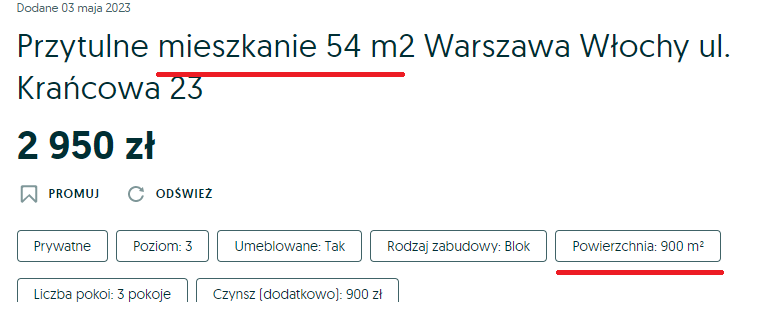

In [73]:
df.loc[6927, 'Sq_meters'] = 54 

## Mieszkania o największej powierzchni

In [74]:
df['Sq_meters'].sort_values(ascending=False).head(25)

12790    667
18282    628
18410    627
4038     437
5928     380
9968     345
2244     327
9619     306
10055    306
13453    305
13201    300
18420    294
10053    277
7151     268
9932     268
7191     263
10052    252
9921     250
16578    250
3646     250
7155     250
9685     248
14399    244
16621    242
7270     241
Name: Sq_meters, dtype: int64

In [75]:
df.loc[12790]['WebLink'] #Kamienica nie mieszkanie

'https://www.olx.plhttps://www.otodom.pl/pl/oferta/kamienica-przy-ulicy-golebiej-4-w-poznaniu-ID4j3mn.html'

In [76]:
df.loc[18282]['WebLink'] #Oferta strychu w kamienicy

'https://www.olx.pl/d/oferta/628m2-strych-do-adaptacji-ok-rynku-podgorskiego-CID3-IDUG0U8.html'

In [77]:
df.loc[2244]['WebLink'] # Lokal biurowy

'https://www.olx.pl/d/oferta/lokal-biurowy-stare-miasto-od-zaraz-duzy-taras-CID3-IDQVb0Y.html'

Po wstępnym sprawdzeniu wybrano mieszkania o powierzchni **mniejszej niż 306m2**

## Mieszkania o bardzo małej powierzchni 

<Axes: >

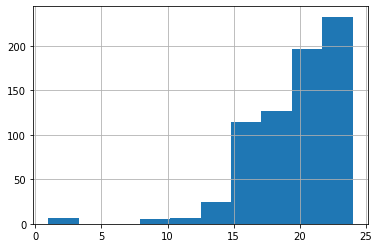

In [78]:
df[df['Sq_meters'] < 25 ]['Sq_meters'].hist()

In [79]:
df[df['Sq_meters'] < 15 ]

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
24,Wrocław,Stare Miasto,Wynajem,Kawalerka,2400.0,Brak możliwości negocjacji,2,1,https://www.olx.pl/d/oferta/mieszkanie-na-wyna...
40,Wrocław,Stare Miasto,Wynajem,Kawalerka,2170.0,Do negocjacji,1,1,https://www.olx.pl/d/oferta/mega-okazja-kawale...
188,Wrocław,Stare Miasto,Wynajem,Kawalerka,2190.0,Brak możliwości negocjacji,14,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
190,Wrocław,Stare Miasto,Wynajem,Kawalerka,2190.0,Brak możliwości negocjacji,14,1,https://www.olx.pl/d/oferta/wynajem-mieszkanie...
1090,Wrocław,Stare Miasto,Wynajem,2-pokoje,1800.0,Brak możliwości negocjacji,10,2,https://www.olx.pl/d/oferta/wynajem-mikrokawal...
1670,Wrocław,Stare Miasto,Wynajem,3-pokoje,2800.0,Brak możliwości negocjacji,10,3,https://www.olx.pl/d/oferta/lubuska-3-pok-rozk...
2333,Wrocław,Psie Pole,Sprzedaz,Kawalerka,199000.0,Do negocjacji,10,1,https://www.olx.pl/d/oferta/mini-lokal-kawaler...
4988,Warszawa,Targówek,Wynajem,Kawalerka,1650.0,Brak możliwości negocjacji,14,1,https://www.olx.pl/d/oferta/ziemowita-4-targow...
5002,Warszawa,Praga-Północ,Wynajem,Kawalerka,2230.0,Brak możliwości negocjacji,14,1,https://www.olx.pl/d/oferta/kawalerka-praga-po...
6482,Warszawa,Mokotów,Wynajem,3-pokoje,6000.0,Brak możliwości negocjacji,3,3,https://www.olx.pl/d/oferta/wynajem-mieszkania...


In [80]:
df[df['Sq_meters'] < 15 ]['Sq_meters'].value_counts()

Sq_meters
14    22
1      4
10     4
11     4
13     2
12     2
2      1
3      1
9      1
Name: count, dtype: int64

Odrzucono z ofert kawalerki o powierzchni **do 10m2**. Właściciele poprawnie nie uzupełniają tych informacji

In [81]:
df = df[(df['Sq_meters'] <= 306) & (df['Sq_meters'] >= 10)].copy()

In [82]:
df

,City,District,Category,Property layout,Price,Negotiation,Sq_meters,Rooms,WebLink
0,Wrocław,Fabryczna,Wynajem,Kawalerka,1800.0,Brak możliwości negocjacji,35,1,https://www.olx.pl/d/oferta/kawalerka-do-wynaj...
1,Wrocław,Psie Pole,Wynajem,Kawalerka,1700.0,Brak możliwości negocjacji,22,1,https://www.olx.pl/d/oferta/nowoczesna-kawaler...
2,Wrocław,Fabryczna,Wynajem,Kawalerka,2100.0,Brak możliwości negocjacji,25,1,https://www.olx.pl/d/oferta/kuzniki-kawalerka-...
3,Wrocław,Fabryczna,Wynajem,Kawalerka,2413.0,Brak możliwości negocjacji,26,1,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
4,Wrocław,Fabryczna,Wynajem,Kawalerka,2200.0,Brak możliwości negocjacji,32,1,https://www.olx.pl/d/oferta/wynajme-duza-kawal...
...,...,...,...,...,...,...,...,...,...
18509,Kraków,Podgórze Duchackie,Sprzedaz,4-pokoje,763020.0,Brak możliwości negocjacji,71,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
18510,Kraków,Podgórze Duchackie,Sprzedaz,4-pokoje,791280.0,Brak możliwości negocjacji,71,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
18511,Kraków,Wzgórza Krzesławickie,Sprzedaz,4-pokoje,599000.0,Brak możliwości negocjacji,81,4,https://www.olx.plhttps://www.otodom.pl/pl/ofe...
18512,Kraków,Bieńczyce,Sprzedaz,4-pokoje,1100000.0,Do negocjacji,89,4,https://www.olx.pl/d/oferta/apartament-dwupozi...


In [83]:
print('Ilość danych błędnie wprowadzonych: ', len_data_after_cleaning - len(df))

Ilość danych błędnie wprowadzonych:  684


In [84]:
(len_data_after_cleaning - len(df))/len_data_after_cleaning*100

3.5654712260216845

# 4. Podsumowanie

- 684 oferty zostały błędnie wprowadzone przez użytkowników OLX (3,5 % wszystkich ogłoszeń)
- Niektóre mieszkania mają złą kateogrię powinny być w sekcji wynajmu pojedynczych pokoi lub pokoi na dobę. 
- Błędne wpisywanie wielkości lokali 
- Zaliczanie lokali biurowych/gastronomicznych lub całych kamienic jako mieszkania na sprzedaż
- Wpisywanie dzielnic, które są przestarzałe (Gdańsk) lub łączenie kilku dzielnic w jedną (Wrocław - Krzyki) 

In [85]:
df.reset_index(drop=True, inplace=True)
df.to_excel('property_market_final.xlsx', index=False)